## <p style="text-align: center;"> <font color = 'teal'> BIKE SHARING SERVICE - PREDICTION MODELING </font> </p>

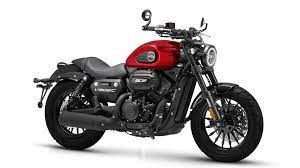

### <font color="#00008B">1. Reading And Understanding of Data</font>

In [1]:
# importing Libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings

import warnings
warnings.filterwarnings(action="ignore")

# importing ml specific libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# reading business data - here will explore categorical and continuous variables

bike_df = pd.read_csv("day.csv")

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# checking for null or missing values

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# number of columns and rows in df

bike_df.shape

(730, 16)

In [7]:
# Below columns in the df are not relevant & will create another variable without having these fields.
# - instant (this is nothing but a row index , which does not add any value)
# - dteday (since we are focusing at monthly and yearly growth in demand, date field will not add any value)
# - casual (discarding beacuse as we are targeting one dependent variable which is cnt)
# - registered (discarding beacuse as we are targeting one dependent variable which is cnt)

bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike_df_cc = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [9]:
bike_df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
bike_df_cc.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# we have few fields which signifies data as in categorical form, lets convert those fields into category type.

bike_df_cc["season"] = bike_df_cc["season"].astype("category")
bike_df_cc["mnth"] = bike_df_cc["mnth"].astype("category")
bike_df_cc["weekday"] = bike_df_cc["weekday"].astype("category")
bike_df_cc["weathersit"] = bike_df_cc["weathersit"].astype("category")

In [12]:
bike_df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [13]:
# let's create dummy varibales for above categorical fields by using get_dummies function from pandas

bike_df_cc = pd.get_dummies(bike_df_cc, drop_first=True)
bike_df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [14]:
bike_df_cc.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.266317,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
bike_df_cc.shape

(730, 30)

### <font color="#00008B">2. Data split</font>

In [16]:
# train_test_split

np.random.seed(0)
df_train , df_test = train_test_split(bike_df_cc, train_size=0.70 , test_size=0.30, random_state=42)

In [17]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### <font color="#00008B">3. Data Exploration / EDA</font>

**<font color='maroon'>Analysing continuous variables</font>**

In [18]:
# df_train.info()

print(df_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [19]:
# new variables for reading only continuous data.
num_vars = df_train[["temp","atemp","hum","windspeed","cnt"]]

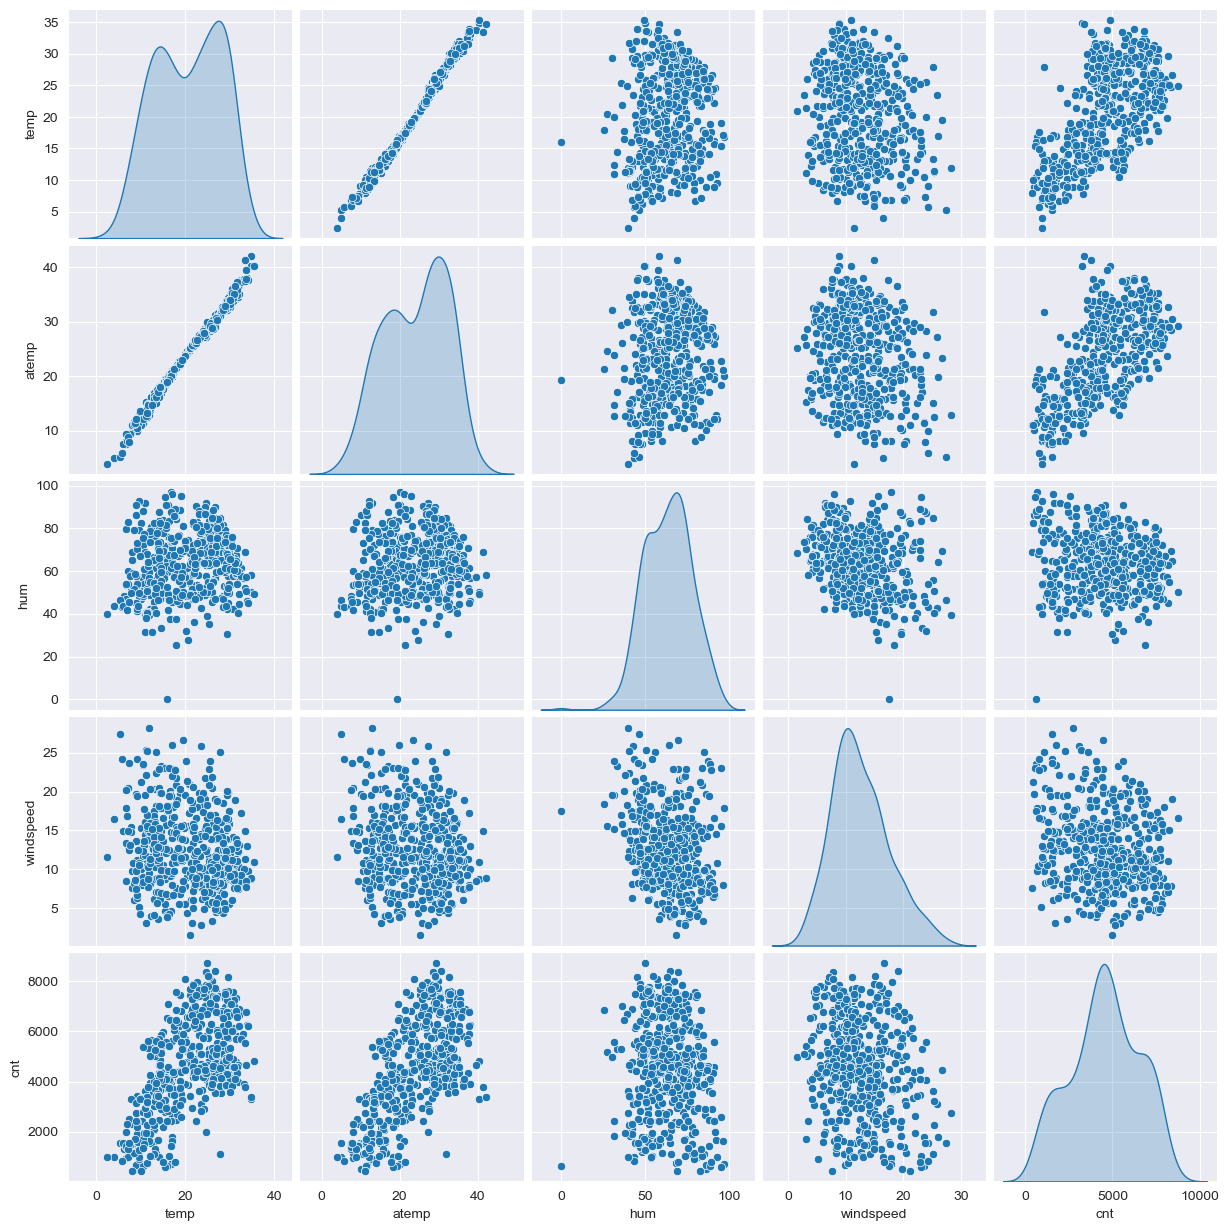

In [20]:
sns.set_style('darkgrid')
sns.pairplot(data=num_vars,diag_kind="kde",palette="deep")
plt.show()

- <font color='green'>Above pair plot indicates that there is a linear relation between temp, atemp and cnt.</font>

**<font color='maroon'>Now, let's analyse categorical variables.**</font>

In [21]:
# bike_df.info()

bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

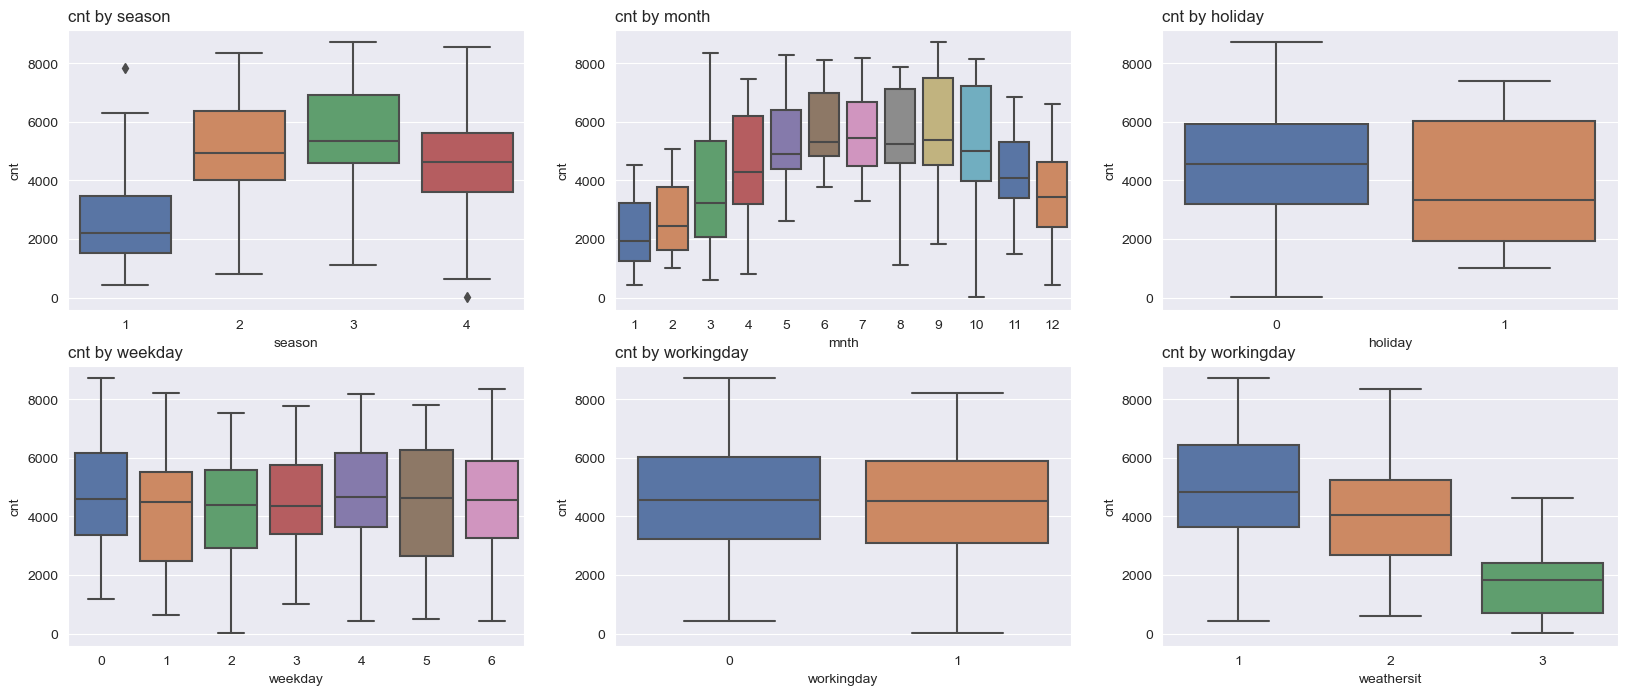

In [22]:
plt.figure(figsize=[20,8])

plt.subplot(2,3,1)
sns.boxplot(data=bike_df,x="season",y="cnt",palette = 'deep')
plt.title("cnt by season", loc="left")

plt.subplot(2,3,2)
sns.boxplot(data=bike_df,x="mnth",y="cnt",palette = 'deep')
plt.title("cnt by month", loc="left")

plt.subplot(2,3,3)
sns.boxplot(data=bike_df,x="holiday",y="cnt",palette = 'deep')
plt.title("cnt by holiday", loc="left")

plt.subplot(2,3,4)
sns.boxplot(data=bike_df,x="weekday",y="cnt",palette = 'deep')
plt.title("cnt by weekday", loc="left")

plt.subplot(2,3,5)
sns.boxplot(data=bike_df,x="workingday",y="cnt",palette = 'deep')
plt.title("cnt by workingday", loc="left")

plt.subplot(2,3,6)
sns.boxplot(data=bike_df,x="weathersit",y="cnt",palette = 'deep')
plt.title("cnt by workingday", loc="left")

plt.show()

<font color = 'green'>Inferences from categorical variable</font>

- <font color='grey'>**Season** 3 is having more bookings followed by season 2 and 4.</font>


- <font color='grey'>In the **month** of 5,6,7,8,8 bookings went quite high.</font>


- <font color='grey'>**Holiday** is not a good predictor since booking does not seem to be happening on holidays.</font>


- <font color='grey'>The **weekday** booking trend seems to be flat, ranging between 4000 to 5000.</font>


- <font color='grey'>Nearly 6000 bookings are happening during the **working day**, we can say working day can be a good predictor.</font>


- <font color='grey'>From a **weather situation** point of view, the majority of bookings are happening during weathersit1 followed by weathersit2. Hence, it can be a good predictor for the dependent variable.</font>

**<font color='maroon'>Correlation Matrix</font>**

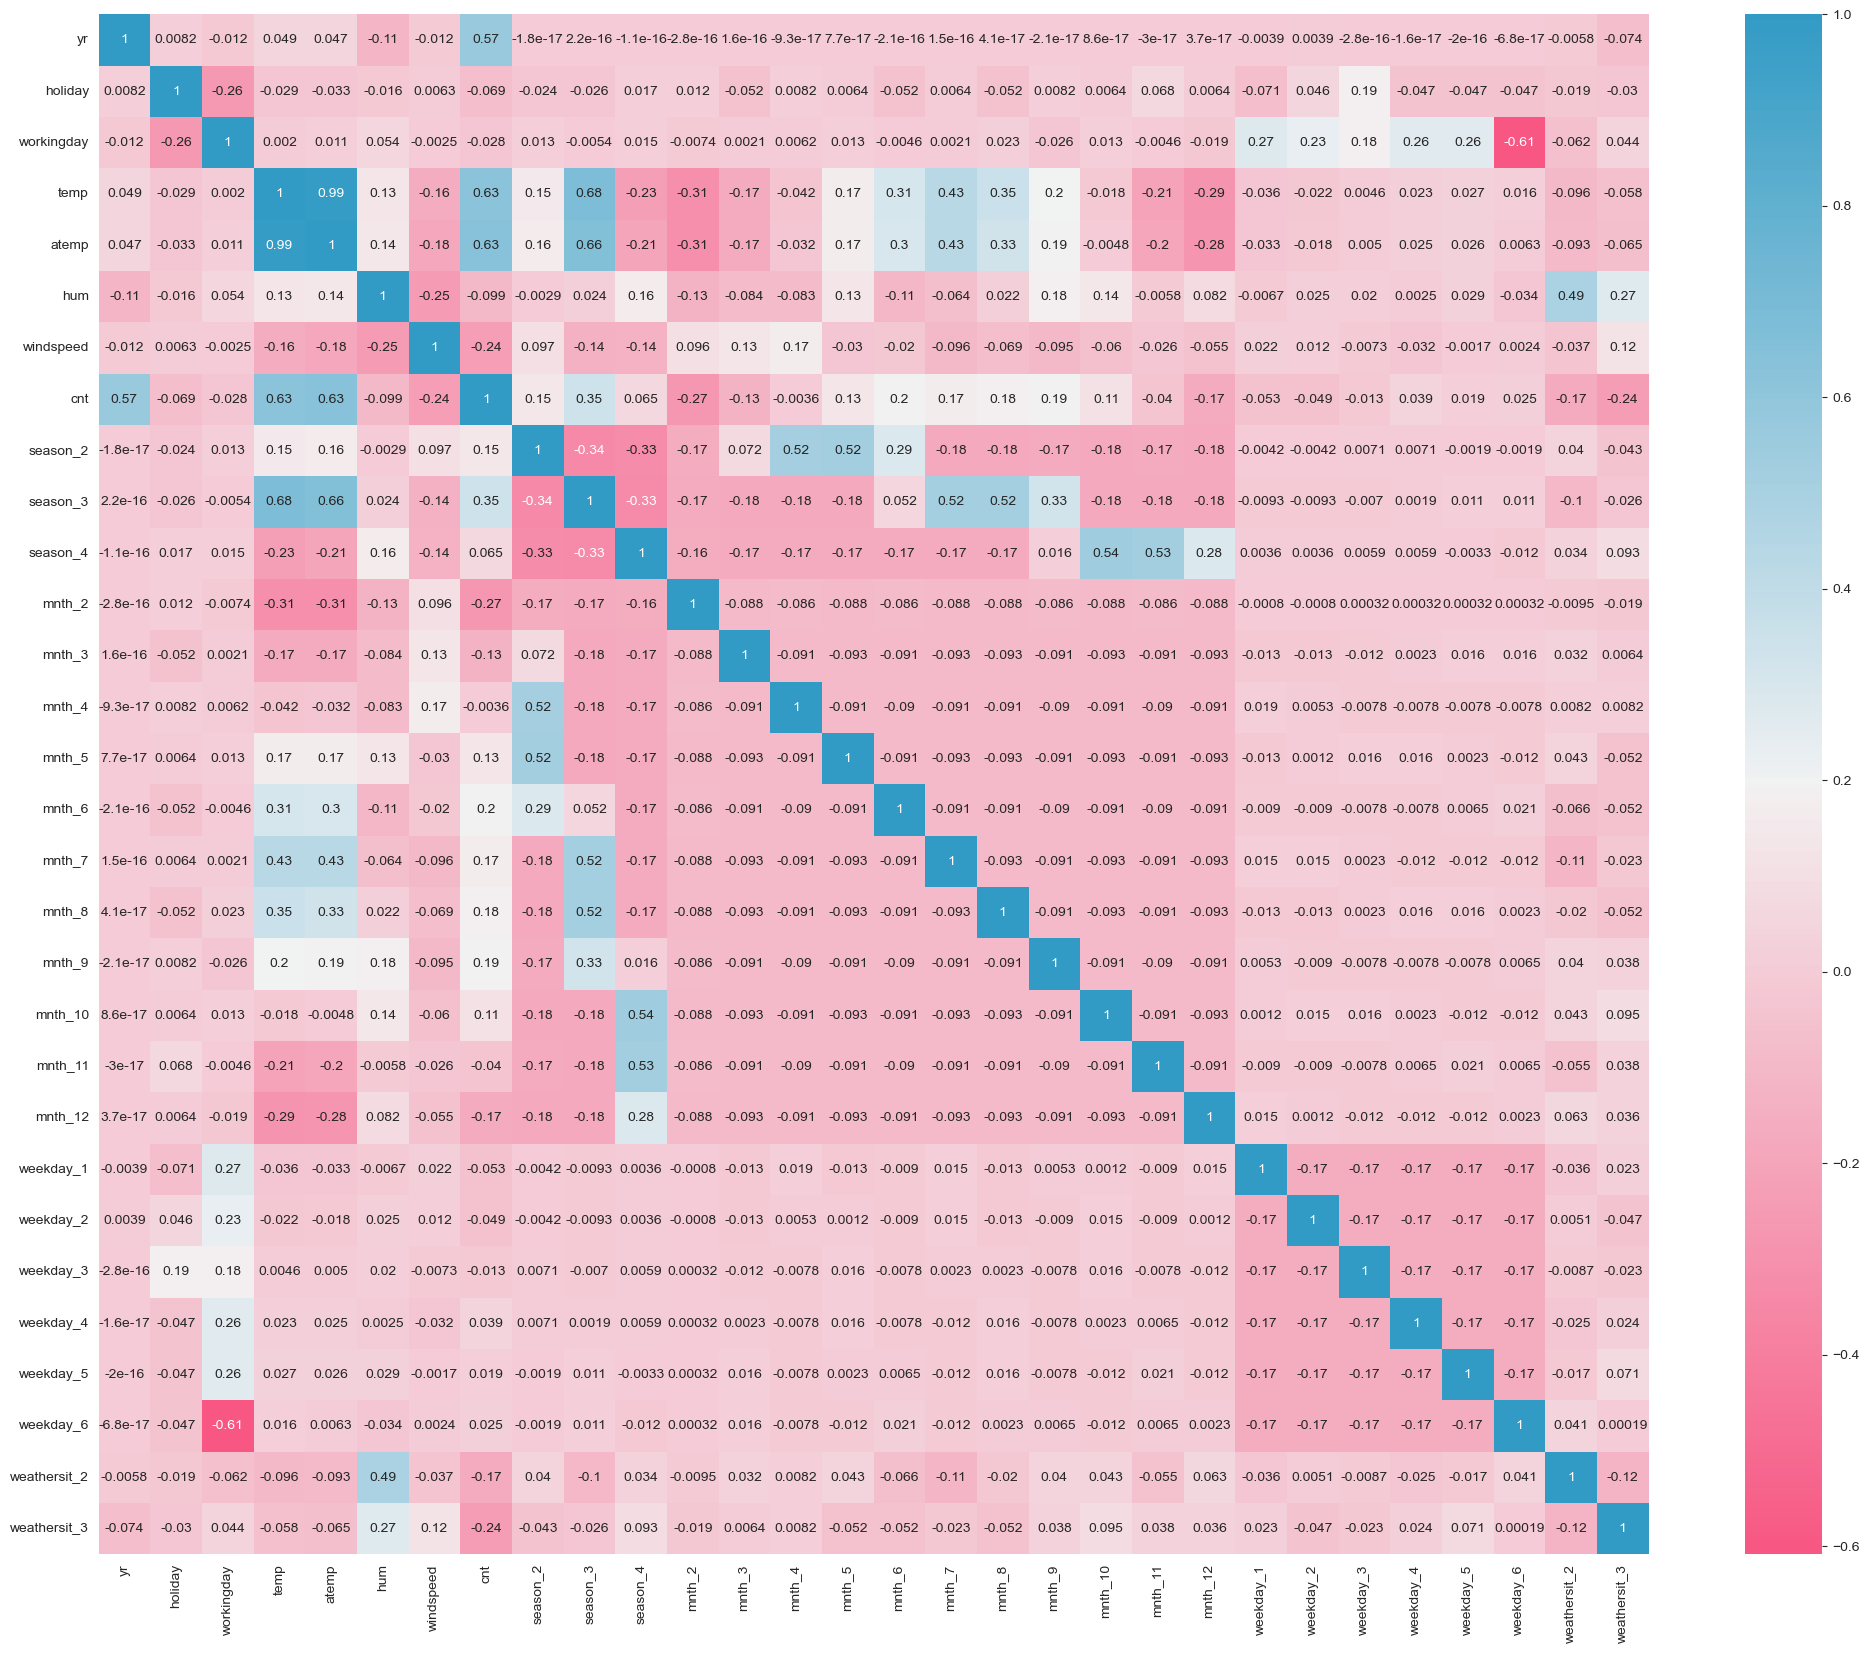

In [23]:
plt.figure(figsize=[25,20])
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(bike_df_cc.corr(),annot=True,cmap=cmap)
plt.show()

### <font color="#00008B">4. Rescaling the Features</font>

In [24]:
# defining the estimator

scaler = MinMaxScaler()

In [25]:
# columns in train dataset

df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
683,1,0,1,13.188347,16.22460,62.0417,10.250129,5445,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
645,1,1,0,15.716653,19.38040,70.9583,12.708493,5478,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,5020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [27]:
scaler_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [28]:
# Transforming features by scaling each feature to a range (0 to 1).

df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [29]:
# checking the fit of the above scaler variables

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.551091,0.526680,0.653801,0.414566,0.498206,0.256863,0.260784,0.250980,0.074510,0.062745,0.084314,0.092157,0.084314,0.092157,0.074510,0.090196,0.090196,0.092157,0.074510,0.149020,0.156863,0.133333,0.135294,0.149020,0.143137,0.345098,0.029412
std,0.500025,0.163554,0.459559,0.227401,0.213153,0.143542,0.185671,0.233905,0.437332,0.439494,0.434003,0.262857,0.242742,0.278131,0.289531,0.278131,0.289531,0.262857,0.286744,0.286744,0.289531,0.262857,0.356457,0.364028,0.340268,0.342373,0.356457,0.350557,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,1.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color="#00008B">5. Building Linear Model</font>

In [30]:
y_train = df_train.pop("cnt")
X_train = df_train

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm , n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 2),
 ('mnth_4', False, 15),
 ('mnth_5', False, 4),
 ('mnth_6', False, 9),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 5),
 ('weekday_2', False, 7),
 ('weekday_3', False, 6),
 ('weekday_4', False, 13),
 ('weekday_5', False, 14),
 ('weekday_6', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [35]:
X_train_rfe = X_train[col]

**<font color="purple">Model 1</font>**

In [36]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

        Features      VIF
3          atemp  1274.28
2           temp  1263.51
4            hum    17.75
7       season_3     7.82
5      windspeed     4.93
6       season_2     4.14
8       season_4     4.11
13  weathersit_2     2.13
0             yr     2.05
11       mnth_11     1.93
9         mnth_7     1.86
10        mnth_9     1.53
12       mnth_12     1.39
14  weathersit_3     1.25
1        holiday     1.05

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.17e-184
Time:                        14:43:15   Log-Likelihood:                 483.15
No. Observations:                 510   AIC:                            -934.3
Df Residuals:                 

**<font color="purple">Model 2</font>**

In [37]:
X_train_rfe = X_train_rfe.drop("atemp",axis=1)

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

        Features    VIF
2           temp  26.11
3            hum  16.39
6       season_3   7.77
4      windspeed   4.58
5       season_2   4.12
7       season_4   4.08
12  weathersit_2   2.09
0             yr   2.05
10       mnth_11   1.93
8         mnth_7   1.85
9         mnth_9   1.53
11       mnth_12   1.39
13  weathersit_3   1.21
1        holiday   1.04

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          2.49e-185
Time:                        14:43:15   Log-Likelihood:                 482.03
No. Observations:                 510   AIC:                            -934.1
Df Residuals:                     495   BIC:                            -870.5
Df Mode

**<font color="purple">Model 3</font>**

In [38]:
X_train_rfe = X_train_rfe.drop("hum",axis=1)

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

        Features    VIF
2           temp  16.31
5       season_3   7.39
6       season_4   4.08
3      windspeed   4.02
4       season_2   4.00
0             yr   2.05
9        mnth_11   1.88
7         mnth_7   1.83
11  weathersit_2   1.55
8         mnth_9   1.52
10       mnth_12   1.30
12  weathersit_3   1.10
1        holiday   1.03

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          7.53e-183
Time:                        14:43:15   Log-Likelihood:                 473.38
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     496   BIC:                            -859.5
Df Model:                      

**<font color="purple">Model 4</font>**

In [39]:
X_train_rfe = X_train_rfe.drop("mnth_7",axis=1)

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

        Features    VIF
2           temp  16.00
5       season_3   6.92
6       season_4   4.08
3      windspeed   3.99
4       season_2   3.97
0             yr   2.05
8        mnth_11   1.88
10  weathersit_2   1.55
7         mnth_9   1.32
9        mnth_12   1.29
11  weathersit_3   1.10
1        holiday   1.03

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          4.80e-183
Time:                        14:43:15   Log-Likelihood:                 471.08
No. Observations:                 510   AIC:                            -916.2
Df Residuals:                     497   BIC:                            -861.1
Df Model:                          12                  

**<font color="purple">Model 5</font>**

In [40]:
X_train_rfe = X_train_rfe.drop("season_3",axis=1)

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

        Features   VIF
2           temp  4.12
3      windspeed  3.80
5       season_4  2.29
0             yr  2.03
7        mnth_11  1.79
4       season_2  1.66
9   weathersit_2  1.54
8        mnth_12  1.29
6         mnth_9  1.24
10  weathersit_3  1.10
1        holiday  1.03

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          7.68e-179
Time:                        14:43:15   Log-Likelihood:                 458.32
No. Observations:                 510   AIC:                            -892.6
Df Residuals:                     498   BIC:                            -841.8
Df Model:                          11                                         
Covariance T

**<font color="purple">Model 6</font>**

In [41]:
X_train_rfe = X_train_rfe.drop("mnth_11",axis=1)

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

       Features   VIF
2          temp  4.08
3     windspeed  3.70
0            yr  2.03
4      season_2  1.66
8  weathersit_2  1.54
5      season_4  1.45
6        mnth_9  1.23
7       mnth_12  1.19
9  weathersit_3  1.09
1       holiday  1.03

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.2
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.32e-178
Time:                        14:43:15   Log-Likelihood:                 454.95
No. Observations:                 510   AIC:                            -887.9
Df Residuals:                     499   BIC:                            -841.3
Df Model:                          10                                         
Covariance Type:            nonrobust         

**<font color="purple">Model 7</font>**

In [42]:
X_train_rfe = X_train_rfe.drop("mnth_12",axis=1)

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by=["VIF"],ascending=False)
print(vif)

X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_lm).fit()

print()

print(lr_model.summary())

       Features   VIF
2          temp  4.05
3     windspeed  3.67
0            yr  2.02
4      season_2  1.65
7  weathersit_2  1.51
5      season_4  1.39
6        mnth_9  1.22
8  weathersit_3  1.08
1       holiday  1.03

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.8
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.03e-178
Time:                        14:43:15   Log-Likelihood:                 452.35
No. Observations:                 510   AIC:                            -884.7
Df Residuals:                     500   BIC:                            -842.4
Df Model:                           9                                         
Covariance Type:            nonrobust                               

**<font color = "green">Insights</font>**
- This final model shows VERY LOW Multicollinearity between the predictors and the p-values.
- Lets try and analyse error terms based on this model

### <font color ="purple">The equation of best fitted surface on our final model:</font>

<font color = "#2e86c1"> cnt =  0.052764 + (yr ×  0.239665) - (holiday × 0.089829) + (temp × 0.591790) − (windspeed × 0.096431) + (season2 ×  0.098149) + (season4 ×0.151995) + (mnth9 ×  0.100430) − (weathersit2 × 0.081226) − (weathersit3 × 0.259543)</font>

In [43]:
y_train_pred = lr_model.predict(X_train_lm)

In [44]:
res = y_train - y_train_pred

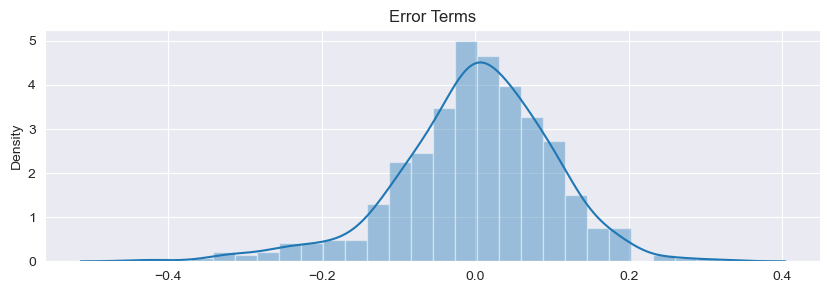

In [45]:
plt.figure(figsize=[10,3])
sns.distplot(res)
plt.title('Error Terms')
plt.show()

**<font color = "green">Insights</font>**
- The above plot indicates that Residuals are Normally distributed. Hence Assumptions for Linear Regression is valid.

In [46]:
# prediction on test set

num_test_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_test_vars] = scaler.transform(df_test[num_test_vars])

In [47]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0.526017,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,0.318363,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [48]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.527468,0.501760,0.629546,0.435511,0.479553,0.237443,0.251142,0.228311,0.082192,0.136986,0.073059,0.068493,0.077626,0.068493,0.109589,0.063927,0.073059,0.059361,0.109589,0.132420,0.114155,0.164384,0.159817,0.123288,0.141553,0.315068,0.027397
std,0.498836,0.176306,0.470841,0.229936,0.215759,0.152584,0.212750,0.233091,0.426491,0.434663,0.420705,0.275286,0.344621,0.260830,0.253169,0.268194,0.253169,0.313092,0.245183,0.260830,0.236840,0.313092,0.339723,0.318728,0.371472,0.367276,0.329520,0.349389,0.465607,0.163612
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
y_test = df_test.pop("cnt")
X_test = df_test

In [50]:
X_test = X_test[X_train_rfe.columns]

In [51]:
X_test_lm = sm.add_constant(X_test)

In [52]:
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [53]:
y_test_predict = lr_model.predict(X_test_lm)

#### <font color="#00008B">Model Evaluation</font>

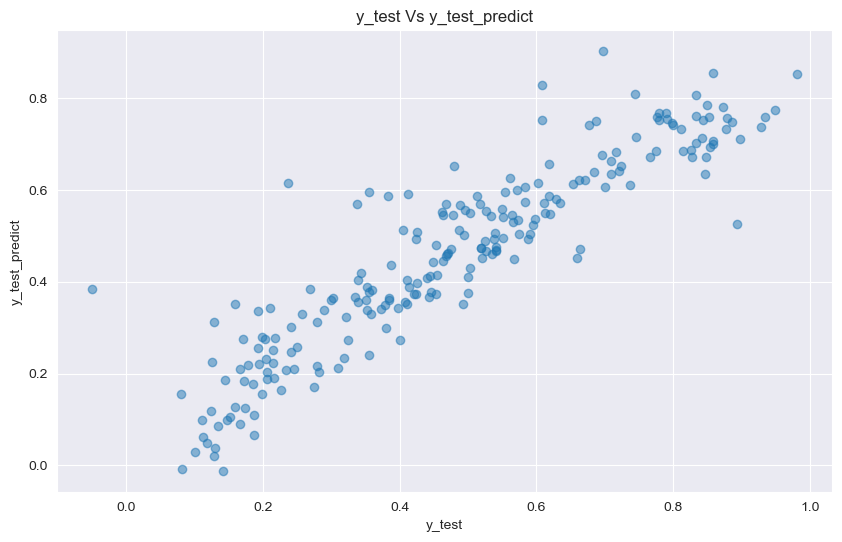

In [54]:
# model evaluation

plt.figure(figsize=[10,6])
plt.scatter(y_test, y_test_predict, alpha=.5)
plt.title("y_test Vs y_test_predict")             # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_test_predict')
plt.show()

### <font color="#00008B">6. R-Squared value for Test</font>

In [55]:
r2 = r2_score(y_test,y_test_predict)

In [56]:
print("R-squared:",r2)

R-squared: 0.8200063917799588


In [57]:
# adjusted r2

n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print("Adj.R-squared:",adj_r2)

Adj.R-squared: 0.812255470851823


### <font color="#00008B">7. Conclusion</font>


- **Temperature (temp)** - A coefficient value of ‘0.5918’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5918 units.
    
    
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.2595’ indicated that, w.r.t Weathersit_2, a unit increase in Weathersit_3 variable decreases the bike hire numbers by 0.2595 units.
    

- **Year (yr)** - A coefficient value of ‘0.2397’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2397 units.


- **season_4** - A coefficient value of ‘0.1520’ indicated that w.r.t season_2, a unit increase in season_4 variable increases the bike hire numbers by 0.1520 units.


- **indspeed** - A coefficient value of ‘-0.0964’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.0964 units.


**<font color = 'green'>Business should consider these important variables while planning, to achieve maximum Booking.**</font>